# <span style="color:#37464f"><center>**Yannick NOUDJOUKOUANG**</center></span>
### **<center>JEDHA (FULLSTACK - 2021)</center>**
# **<center>SUPERVISED MACHINE LEARNING</center>**
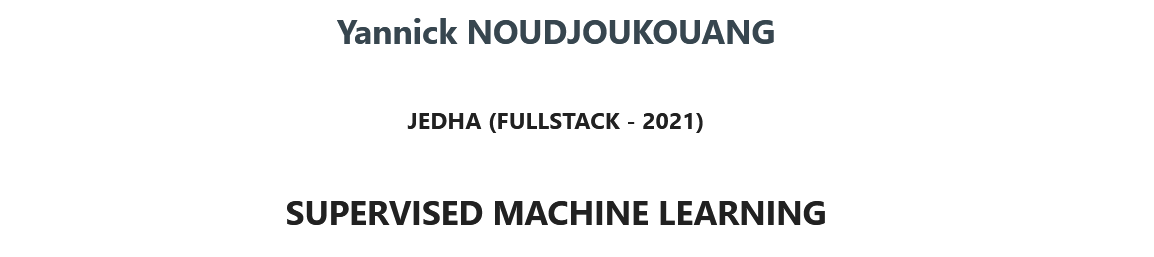

---


## <span>**PLAN**</span>

1. Introduction
2. Data collection & EDA
3. Data visualization
4. Preprocessing & Machine Learning
5. Model assessment & Regularization
6. Conclusion

---


### **1. Introduction**
---

**Good to know** : Machine learning is a multidisciplinary science that aims at enabling machines to solve complex problems without explicitely coding the decision making process.
Supervised machine learning is a branch of this discipline that consists in solving problems for which there are already solved examples.

<img src="https://www.bestdesigns.co/uploads/inspiration_images/4350/990__1511457498_404_walmart.png" alt="WALMART LOGO" />


# Walmart : predict weekly sales

## Company's Description 📇

Walmart Inc. is an American multinational retail corporation that operates a chain of hypermarkets, discount department stores, and grocery stores from the United States, headquartered in Bentonville, Arkansas. The company was founded by Sam Walton in 1962.

The company employed around 2.3 million people globally for a revenue of $524 billion in 2020.



### **2. Data collection & EDA**
---

## A) IMPORT LIBRARIES

In [1]:
!pip install plotly -q

In [2]:
!pip install missingno -q

In [3]:
import numpy as np
import pandas as pd
import random
from datetime import datetime, timedelta
#from datetime import timedelta
import missingno as mi

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.preprocessing import  OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import accuracy_score, confusion_matrix

import statsmodels.api as sm

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) # to avoid deprecation warnings

from sklearn.linear_model import Lasso

import seaborn as sns

# Force to display all columns in the notebook
pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
# setting Jedha color palette as default
pio.templates["jedha"] = go.layout.Template(
    layout_colorway=["#4B9AC7", "#4BE8E0", "#9DD4F3", "#97FBF6", "#2A7FAF", "#23B1AB", "#0E3449", "#015955"]
)
pio.templates.default = "jedha"
pio.renderers.default = "iframe" # to be replaced by "iframe" if working on JULIE

## B) EXPLORATORY DATA ANALYSIS

### 1. Dataset overview

In [4]:
#Import and read the csv : Walmart Store Sales
df = pd.read_csv('Walmart_Store_sales.csv')
display(df.head())
df.shape

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,6.0,18-02-2011,1572117.54,NaN,59.61,3.045,214.777523,6.858
1,13.0,25-03-2011,1807545.43,0.0,42.38,3.435,128.616064,7.470
2,17.0,27-07-2012,NaN,0.0,NaN,NaN,130.719581,5.936
3,11.0,NaN,1244390.03,0.0,84.57,NaN,214.556497,7.346
4,6.0,28-05-2010,1644470.66,0.0,78.89,2.759,212.412888,7.092


(150, 8)

In [5]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,150.000000,1.360000e+02,138.000000,132.000000,136.000000,138.000000,135.000000
mean,9.866667,1.249536e+06,0.079710,61.398106,3.320853,179.898509,7.598430
std,6.231191,6.474630e+05,0.271831,18.378901,0.478149,40.274956,1.577173
min,1.000000,2.689290e+05,0.000000,18.790000,2.514000,126.111903,5.143000
25%,4.000000,6.050757e+05,0.000000,45.587500,2.852250,131.970831,6.597500
50%,9.000000,1.261424e+06,0.000000,62.985000,3.451000,197.908893,7.470000
75%,15.750000,1.806386e+06,0.000000,76.345000,3.706250,214.934616,8.150000
max,20.000000,2.771397e+06,1.000000,91.650000,4.193000,226.968844,14.313000


ROUGH ANALYSIS : 
 
* The dataset has 150 rows and 8 columns.
 
------------------
 
Number of unic items
 
Store            20
Date             85
Weekly_Sales    136
Holiday_Flag      2
Temperature     130
Fuel_Price      120
CPI             135
Unemployment    104
dtype: int64
 
------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         150 non-null    float64
 1   Date          132 non-null    object 
 2   Weekly_Sales  136 non-null    float64
 3   Holiday_Flag  138 non-null    float64
 4   Temperature   132 non-null    float64
 5   Fuel_Price    136 non-null    float64
 6   CPI           138 non-null    float64
 7   Unemployment  135 non-null    float64
dtypes: float64(7), object(1)
memory usage: 9.5+ KB
None
 
Visualizing missing value gap using bar graph
 
------------------


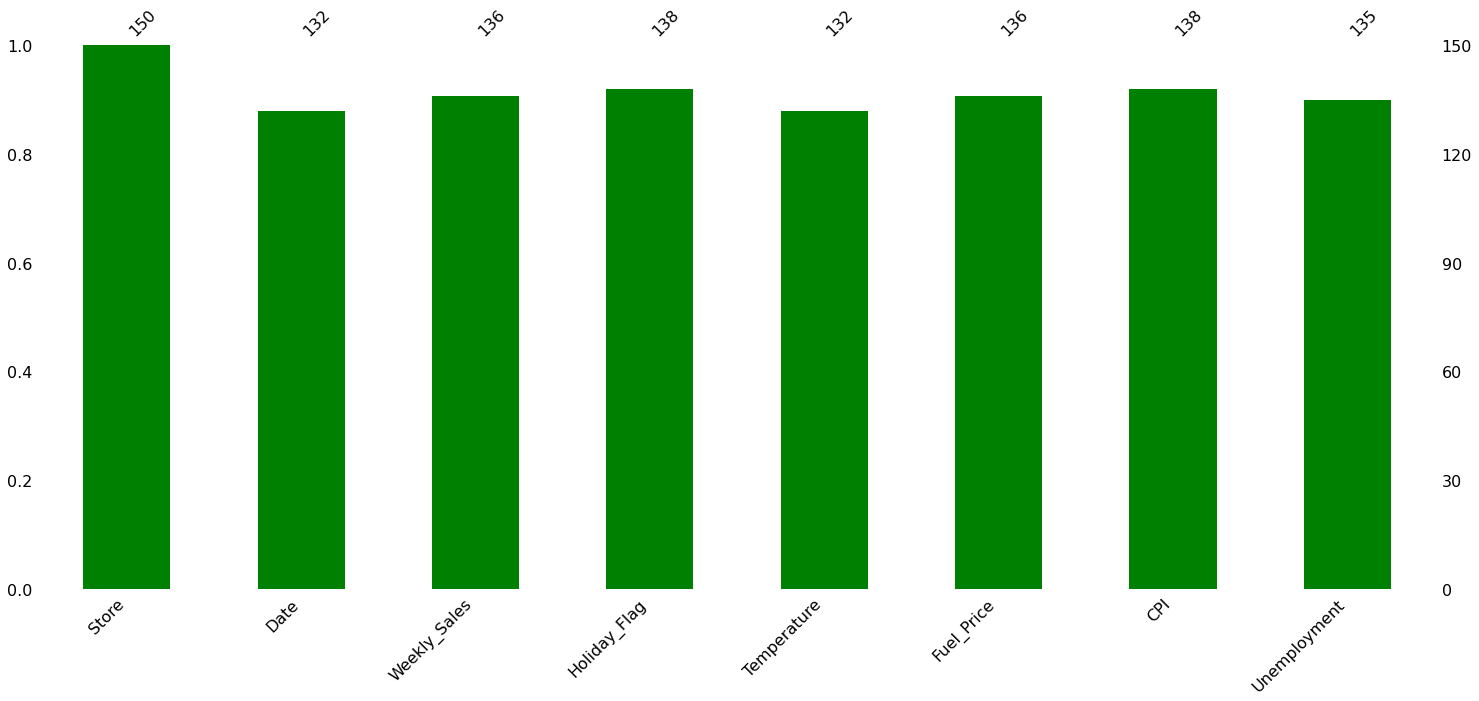

In [6]:
print('ROUGH ANALYSIS : ')
print(' ')
print('* The dataset has {} rows and {} columns.'.format(df.shape[0],df.shape[1]))
print(' ')
print('------------------')
print(" ")
print('Number of unic items')
print(' ')
print(df.nunique())
print(' ')
print('------------------')
print(df.info())
print(' ')
print("Visualizing missing value gap using bar graph")
print(" ")
mi.bar(df, color='green');
print('------------------')


- We have 3 qualitatives and 5 quantitatives features.
- The qualitatives columns are : Store, Date and Holiday_Flag even if they look numeric at the first sight
- Several columns have missing values that we will try to replace trough an EDA process

### 2. Missing values

In [7]:
print(df.isnull().sum())
print(' ')
print('------------------')
print(' ')
print('We can see that except the column "Store" all the other columns have missing values')
print(' ')
print('------------------')
print(' ')
print("Percentage of missing values:(%)")
display(round(100*df.isnull().sum()/df.shape[0],1))
print(' ')

Store            0
Date            18
Weekly_Sales    14
Holiday_Flag    12
Temperature     18
Fuel_Price      14
CPI             12
Unemployment    15
dtype: int64
 
------------------
 
We can see that except the column "Store" all the other columns have missing values
 
------------------
 
Percentage of missing values:(%)


Store            0.0
Date            12.0
Weekly_Sales     9.3
Holiday_Flag     8.0
Temperature     12.0
Fuel_Price       9.3
CPI              8.0
Unemployment    10.0
dtype: float64

***Obs*** : Based on the above statistics of missing values, we cannot considere to delete any columns as the % of missing values is quite acceptable (below 15%).<br>

* At the moment, we would only considere to delete missing rows for the target column ('Weekly_Sales').<br>

* We are going to apply transformations and preprocessing on the dataset in order clean the file for the Machine Learning.

## C) DATA ENGINEERING : Dataset transformation

In [8]:
#Create a new dataset on which we will apply all the transformations
df_clean = df

We do not need to apply any transformation on column 'Store' as there are non missing values in it.

### 1. Management on column: 'Date'

In [9]:
#Transform the Date column within the format datetime
df_clean['Date'] = pd.to_datetime(df_clean['Date'])


In [10]:
#Implemente random date function
def randome_date():
    date_min = df_clean['Date'].min().date()
    date_max = df_clean['Date'].max().date()
    day_gap = date_max - date_min
    nbr_day_gap = day_gap.days
    random_nbr_day_gap = random.randrange(nbr_day_gap)
    random_date = date_min + timedelta(days=random_nbr_day_gap)
    return random_date

In [11]:
#Generate random date into a determined range
randome_date()

datetime.date(2011, 1, 27)

In [12]:
#Create a missing values index on column 'Date'
index_nan_date = df_clean['Date'][df_clean['Date'].isna()].index

#Create a random list of dates
list_fill_date = [randome_date() for _ in range(len(index_nan_date))]

#Create a dictionary comprehension to match random date with missing vales index
dict_date = {k:v for k,v in zip(index_nan_date,list_fill_date)}

#Fill missing values in with random dates between max and min date in "Column Date"
df_clean['Date'] = df_clean['Date'].fillna(dict_date)

In [13]:
#Watch out the random date created for the missing values in column 'Date'
dict_date

{3: datetime.date(2011, 4, 5),
 9: datetime.date(2011, 8, 11),
 17: datetime.date(2012, 3, 6),
 34: datetime.date(2010, 9, 26),
 42: datetime.date(2012, 1, 19),
 65: datetime.date(2011, 9, 21),
 81: datetime.date(2012, 1, 17),
 82: datetime.date(2012, 4, 3),
 83: datetime.date(2012, 11, 10),
 86: datetime.date(2012, 2, 7),
 88: datetime.date(2011, 4, 27),
 89: datetime.date(2010, 9, 27),
 91: datetime.date(2010, 6, 11),
 92: datetime.date(2011, 5, 27),
 102: datetime.date(2011, 8, 22),
 129: datetime.date(2010, 9, 27),
 137: datetime.date(2010, 12, 24),
 146: datetime.date(2010, 11, 28)}

**It should not remain any missing values regarding the 'Date' but we will implement an "interpolate" technic in order to be sure we fill in all the rows with dates.**

In [14]:
#Sorting the dataframe from Store then Date columns
df_clean = df_clean.sort_values(by=['Store','Date'])

#Implement missing value using Interpolate function just in case we would have forgotten missing values on 'Date'
df_clean = df_clean.interpolate(method='pad',columns='Date')
display(df_clean.head())
display(df_clean.shape)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
95,1.0,2010-05-14 00:00:00,1494251.50,0.0,74.78,2.854,210.337426,7.808
73,1.0,2010-08-27 00:00:00,1449142.92,0.0,85.22,2.619,211.567306,7.787
133,1.0,2010-09-24 00:00:00,1449142.92,0.0,80.94,2.619,211.597225,7.787
44,1.0,2010-12-02 00:00:00,1641957.44,1.0,38.51,2.548,211.242170,8.106
48,1.0,2011-05-08 00:00:00,1624383.75,1.0,91.65,3.684,215.544618,7.962


(150, 8)

### 2. Management on column 'Weekly_Sales'

In [15]:
#Delete all the 'NaN' rows for the feature 'Weekly_Sales'
df_clean = df_clean[pd.notnull(df['Weekly_Sales'])]
deleted_rows_WS = len(df)-len(df_clean)
print('We have removed {} rows from the columns Weekl_Sales due to missing values.'.format(deleted_rows_WS))
print('It\'s the target feature, therefore, there is no sens to remain with \'NaN\' values.')

We have removed 14 rows from the columns Weekl_Sales due to missing values.
It's the target feature, therefore, there is no sens to remain with 'NaN' values.


<ipython-input-15-72c5de7e88ed>:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



### 3. Management on column: 'Holiday_Flag'

In [16]:
#Replace the missing values by the most frequent value of the column
df_clean["Holiday_Flag"].fillna(df_clean["Holiday_Flag"].mode()[0], inplace=True)

#Encoding the values as categorial
df_clean['Holiday_Flag'] = df_clean['Holiday_Flag'].apply(lambda x : 'yes' if x == 1 
                                                                else 'no' if x == 0
                                                                          else x)

### 4. Management on columns: 'Temperature / Fuel_price / CPI / Unemployment'

In [17]:
#Create a class to provide average values per 'Store'
class average_calculations ():
    
    #Creation of a function to calculate the average Temperature per Store
    def average_Weekly_Sales_store(self,store_nb):
        mask = df_clean['Store'] == store_nb
        df_test = df_clean.loc[mask,:]
        average_Weekly_Sales_store = df_test.groupby('Store')['Weekly_Sales'].mean()
        average_Weekly_Sales_store = average_Weekly_Sales_store.values[0]
        return average_Weekly_Sales_store
    
    #Creation of a function to calculate the average Temperature per Store
    def average_temp_store(self,store_nb):
        mask = df_clean['Store'] == store_nb
        df_test = df_clean.loc[mask,:]
        avg_temp_store = df_test.groupby('Store')['Temperature'].mean()
        avg_temp_store = avg_temp_store.values[0]
        return avg_temp_store
    
    #Creation of a function to calculate the average Fuel_Price per Store
    def average_fuelprice_store(self,store_nb):
        mask = df_clean['Store'] == store_nb
        df_test = df_clean.loc[mask,:]
        average_fuelprice_store = df_test.groupby('Store')['Fuel_Price'].mean()
        average_fuelprice_store = average_fuelprice_store.values[0]
        return average_fuelprice_store
    
    #Creation of a function to calculate the average CPI per Store
    def average_CPI_store(self,store_nb):
        mask = df_clean['Store'] == store_nb
        df_test = df_clean.loc[mask,:]
        average_CPI_store = df_test.groupby('Store')['CPI'].mean()
        average_CPI_store = average_CPI_store.values[0]
        return average_CPI_store
    
    #Creation of a function to calculate the average Unemployment per Store
    def average_Unemployment_store(self,store_nb):
        mask = df_clean['Store'] == store_nb
        df_test = df_clean.loc[mask,:]
        average_Unemployment_store = df_test.groupby('Store')['Unemployment'].mean()
        average_Unemployment_store = average_Unemployment_store.values[0]
        return average_Unemployment_store
    
my_class = average_calculations ()

In [18]:
#Create the list of the stores
list_store = df_clean['Store'].unique()
list_store = list(list_store)

#Create a loop to store average amounts per 'Temperature / Fuel_price / CPI / Unemployment' for each specific 'Store'
avg_Weekly_Sales = []
avg_temp = []
avg_fuelprice = []
avg_CPI = []
avg_Unemployment = []

for i in list_store:
    my_class.average_Weekly_Sales_store(i)
    Weekly_Sales = my_class.average_Weekly_Sales_store(i)
    avg_Weekly_Sales.append(Weekly_Sales)

for i in list_store:
    my_class.average_temp_store(i)
    temp = my_class.average_temp_store(i)
    avg_temp.append(temp) 

for i in list_store:
    my_class.average_fuelprice_store(i)
    fuelprice = my_class.average_fuelprice_store(i)
    avg_fuelprice.append(fuelprice)

for i in list_store:
    my_class.average_CPI_store(i)
    CPI = my_class.average_CPI_store(i)
    avg_CPI.append(CPI)
    
for i in list_store:
    my_class.average_Unemployment_store(i)
    Unemployment = my_class.average_Unemployment_store(i)
    avg_Unemployment.append(Unemployment)
    

In [19]:
#Create a table where we store the average for each numeric item per 'Store'
Average_features_store = pd.DataFrame(list_store)
Average_features_store = Average_features_store.rename(columns= {0:'Store'})
Average_features_store['Avg_Weekly_Sales'] = avg_Weekly_Sales
Average_features_store['Avg_Temp'] = avg_temp
Average_features_store['Avg_Fuelprice'] = avg_fuelprice
Average_features_store['Avg_CPI'] = avg_CPI
Average_features_store['Avg_Unemployment'] = avg_Unemployment
Average_features_store = Average_features_store.sort_values(by=['Store'])
Average_features_store = Average_features_store.reset_index(drop=True)
Average_features_store


,Store,Avg_Weekly_Sales,Avg_Temp,Avg_Fuelprice,Avg_CPI,Avg_Unemployment
0,1.0,1.562508e+06,71.002222,3.317444,216.610263,7.646111
1,2.0,1.943034e+06,57.462500,3.196250,214.306369,7.546625
2,3.0,4.030549e+05,71.185833,3.173750,219.814646,7.032167
3,4.0,2.173759e+06,67.218333,3.238500,128.363544,6.233333
4,5.0,3.024997e+05,71.218750,3.316375,216.503883,6.136250
5,6.0,1.551124e+06,72.463333,3.092333,214.377419,6.965833
6,7.0,5.591300e+05,39.967500,3.399250,194.617656,8.431375
7,8.0,8.887541e+05,67.051667,2.914833,216.210537,6.346333
8,9.0,5.068874e+05,74.120000,2.675750,215.001735,6.442500
9,10.0,1.822106e+06,73.336000,3.343600,128.162431,8.436400


In [20]:
#We want to show the relative weight of each 'Store' in terme of weekly sales
list_WS_all0 = []
list_WS_store0 = []
list_WS_percentage0 = []


for i in list_store:
    filter_ = df['Store']==i
    filter_ = df.loc[filter_,:]
    sum_WS_store = filter_['Weekly_Sales'].sum()
    sum_WS_all = df['Weekly_Sales'].sum()
    percentage_WS_store = (sum_WS_store / sum_WS_all)*100
    percentage_WS_store
    
    list_WS_all0.append(sum_WS_all)
    list_WS_store0.append(sum_WS_store)
    list_WS_percentage0.append(percentage_WS_store)
    

### 5. Analysis on sales

,Store,Weekly_Sales_Total_df,WS_Store_df,WS_percentage_df (%)
0,1.0,169936872.6,14062574.86,8.275176
1,2.0,169936872.6,15544268.98,9.147084
2,3.0,169936872.6,4836659.35,2.846151
3,4.0,169936872.6,13042553.90,7.674941
4,5.0,169936872.6,2419997.47,1.424057
5,6.0,169936872.6,9306741.48,5.476587
6,7.0,169936872.6,4473039.62,2.632177
7,8.0,169936872.6,5332524.79,3.137945
8,9.0,169936872.6,2027549.60,1.193119
9,10.0,169936872.6,9110529.05,5.361126


 
--------------------------------------------------------------------------------------
 


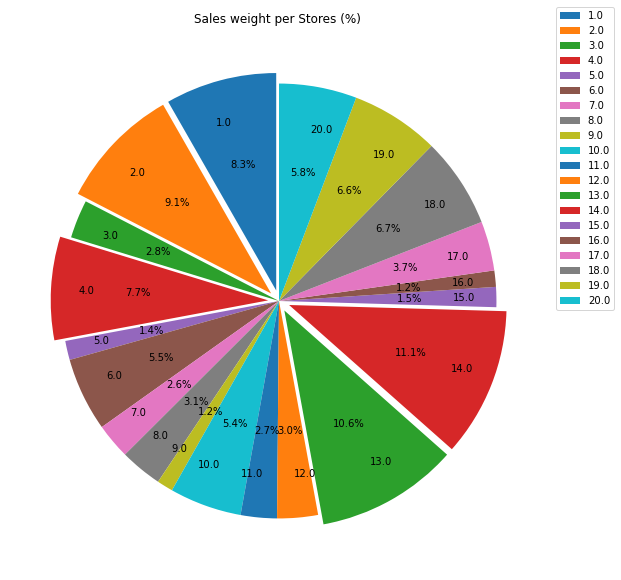

In [21]:
#Create a table where we store the Weekly_Sales amount & percentage per 'Store'
percentage_WS_wtore = pd.DataFrame(list_store)
percentage_WS_wtore = percentage_WS_wtore.rename(columns= {0:'Store'})

percentage_WS_wtore['Weekly_Sales_Total_df'] = list_WS_all0
percentage_WS_wtore['WS_Store_df'] = list_WS_store0
percentage_WS_wtore['WS_percentage_df (%)'] = list_WS_percentage0

percentage_WS_wtore = percentage_WS_wtore.sort_values(by=['Store'])
percentage_WS_wtore = percentage_WS_wtore.reset_index(drop=True)
display(percentage_WS_wtore)
print(' ')
print('--------------------------------------------------------------------------------------')
print(' ')
#Percentage of sales per store
WS_percentage_df = percentage_WS_wtore.groupby(['Store'])['WS_percentage_df (%)'].sum()

# Declaring indexes and values
WS_percentage_df_values = WS_percentage_df.values
WS_percentage_df_index = WS_percentage_df.index

#The pie chart provides the relative weight of each 'Store' in terme of weekly sales
plt.figure(figsize = (10, 10))
plt.pie(WS_percentage_df, 
        autopct = '%1.1f%%',
        labels = WS_percentage_df_index,
        labeldistance = 0.8,
        
        explode = (0.05,0.05,0.0,0.05,0.0,
                   0.0,0.0,0.0,0.0,0.0,
                   0.0,0.0,0.05,0.05,0.0,
                   0.0,0.0,0.0,0.0,0.0),
        
        startangle= 90
           )

plt.legend(WS_percentage_df_index, bbox_to_anchor=(1.0, 1.05))
plt.title("Sales weight per Stores (%) ")

plt.show()

In [22]:
top5_store = WS_percentage_df.loc[1] + WS_percentage_df.loc[2] + WS_percentage_df.loc[4] + WS_percentage_df.loc[13] + WS_percentage_df.loc[14]
print('* We see that the Top 5 stores represente {}% of the whole sales.'.format(round(top5_store,1)))
print('* There is a concentration on some stores because {}% of the store represent almost half ({}%) of the sales.'.format((round(5/len(df_clean['Store'].unique()),3)*100),round(top5_store,1)))
print('* Meaning that 25% of the stores represente {}% of all sales, there is a concentration on some stores.'.format(round(top5_store,1)))

* We see that the Top 5 stores represente 46.8% of the whole sales.
* There is a concentration on some stores because 25.0% of the store represent almost half (46.8%) of the sales.
* Meaning that 25% of the stores represente 46.8% of all sales, there is a concentration on some stores.


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         150 non-null    float64
 1   Date          150 non-null    object 
 2   Weekly_Sales  136 non-null    float64
 3   Holiday_Flag  138 non-null    float64
 4   Temperature   132 non-null    float64
 5   Fuel_Price    136 non-null    float64
 6   CPI           138 non-null    float64
 7   Unemployment  135 non-null    float64
dtypes: float64(7), object(1)
memory usage: 9.5+ KB


### 6. Outliers management

In [24]:
display(df_clean.head().describe(include='all'))

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,5.0,5,5.000000e+00,5,5.000000,5.000000,5.000000,5.000000
unique,NaN,5,NaN,2,NaN,NaN,NaN,NaN
top,NaN,2010-08-27 00:00:00,NaN,no,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,3,NaN,NaN,NaN,NaN
mean,1.0,NaN,1.535156e+06,NaN,76.362000,3.098200,212.839061,7.869000
std,0.0,NaN,9.112583e+04,NaN,22.255262,0.593342,2.492309,0.166006
min,1.0,NaN,1.449143e+06,NaN,38.510000,2.548000,210.337426,7.682000
25%,1.0,NaN,1.466047e+06,NaN,74.780000,2.619000,211.242170,7.787000
50%,1.0,NaN,1.494252e+06,NaN,85.220000,2.854000,211.567306,7.808000
75%,1.0,NaN,1.624384e+06,NaN,91.650000,3.684000,215.503788,7.962000


In [25]:
#Filter on store 12 to assess the possible outliers
display(df_clean.query('Store == 12'))
print(' ')
print('Mean :')
print('--------------------------------')
display(df_clean.query('Store == 12').mean())
print(' ')
print('Min :')
print('--------------------------------')
display(df_clean.query('Store == 12').min())
print(' ')
print('Max :')
print('--------------------------------')
display(df_clean.query('Store == 12').max())

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
135,12.0,2010-10-09 00:00:00,903119.03,yes,83.63,3.044,126.114581,14.180
62,12.0,2010-12-17 00:00:00,1295605.35,no,52.77,3.236,126.879484,14.313
93,12.0,2011-05-27 00:00:00,964332.51,no,52.77,4.087,129.062355,13.736
30,12.0,2011-06-05 00:00:00,1021154.48,no,68.40,4.193,129.044433,13.736
68,12.0,2011-12-08 00:00:00,955913.68,no,91.04,3.701,129.201581,13.503


 
Mean :
--------------------------------


Store           1.200000e+01
Weekly_Sales    1.028025e+06
Temperature     6.972200e+01
Fuel_Price      3.652200e+00
CPI             1.280605e+02
Unemployment    1.389360e+01
dtype: float64

 
Min :
--------------------------------


Store                            12
Date            2010-10-09 00:00:00
Weekly_Sales                 903119
Holiday_Flag                     no
Temperature                   52.77
Fuel_Price                    3.044
CPI                         126.115
Unemployment                 13.503
dtype: object

 
Max :
--------------------------------


Store                            12
Date            2011-12-08 00:00:00
Weekly_Sales            1.29561e+06
Holiday_Flag                    yes
Temperature                   91.04
Fuel_Price                    4.193
CPI                         129.202
Unemployment                 14.313
dtype: object

In [26]:
#Select and remove outliers for the below columns into a list
outlier_columuns = ['Temperature','Fuel_Price','CPI','Unemployment']
#mask = True
for i in outlier_columuns: 
    #Determination of mean / Standard deviation range
    mean = df_clean[i].mean()
    std = df_clean[i].std()
    range_outliers = 3*std
    
    #Determine the max and min outliers' limit
    max_out = mean + range_outliers
    min_out = mean - range_outliers
    
    print('THRESHOLD FOR OUTLIERS')
    print('--------------------------------------------')
    print('The max threshold for {} is {}.'.format(i,round(max_out,1)))
    print('The min threshold for {} is {}.'.format(i,round(min_out,1)))
    print(' ')
    print('--------------------------------------------')
    
    #Determine the masks' parameters
    cond1 = df_clean[i] < max_out
    cond2 = df_clean[i] > min_out
    
    #Determine the mask to apply on the dataset
    mask = df_clean[(cond1) & (cond2)]
    
df_clean = mask

THRESHOLD FOR OUTLIERS
--------------------------------------------
The max threshold for Temperature is 115.9.
The min threshold for Temperature is 5.6.
 
--------------------------------------------
THRESHOLD FOR OUTLIERS
--------------------------------------------
The max threshold for Fuel_Price is 4.7.
The min threshold for Fuel_Price is 1.9.
 
--------------------------------------------
THRESHOLD FOR OUTLIERS
--------------------------------------------
The max threshold for CPI is 297.8.
The min threshold for CPI is 57.9.
 
--------------------------------------------
THRESHOLD FOR OUTLIERS
--------------------------------------------
The max threshold for Unemployment is 12.4.
The min threshold for Unemployment is 2.8.
 
--------------------------------------------


In [27]:
print('Dataset : df(max)')
print('---')
print(df[outlier_columuns].max())
print(' ')
print('--------------------------------------------')
print(' ')
print('Dataset : df_clean(max)')
print(df_clean[outlier_columuns].max())

Dataset : df(max)
---
Temperature      91.650000
Fuel_Price        4.193000
CPI             226.968844
Unemployment     14.313000
dtype: float64
 
--------------------------------------------
 
Dataset : df_clean(max)
Temperature      91.650000
Fuel_Price        4.170000
CPI             226.968844
Unemployment      9.524000
dtype: float64


In [28]:
print('Dataset : df(min)')
print('---')
print(df[outlier_columuns].min())
print(' ')
print('--------------------------------------------')
print(' ')
print('Dataset : df_clean(min)')
print(df_clean[outlier_columuns].min())

Dataset : df(min)
---
Temperature      18.790000
Fuel_Price        2.514000
CPI             126.111903
Unemployment      5.143000
dtype: float64
 
--------------------------------------------
 
Dataset : df_clean(min)
Temperature      18.790000
Fuel_Price        2.514000
CPI             126.111903
Unemployment      5.143000
dtype: float64


In [29]:
print('Dataset : df(shape)')
print('---')
print(df.shape)
print(' ')
print('--------------------------------------------')
print(' ')
print('Dataset : df_clean(shape)')
print(df_clean.shape)



Dataset : df(shape)
---
(150, 8)
 
--------------------------------------------
 
Dataset : df_clean(shape)
(131, 8)


In [30]:
#Calculation of outliers removals
deleted_rows_outliers = len(df)-len(df_clean)-deleted_rows_WS
max_out_Unemployment = df_clean.describe().loc['mean','Unemployment'] + (3*(df_clean.describe().loc['std','Unemployment']))
print('* We have removed {} rows by excluding outliers.'.format(deleted_rows_outliers))
print('* All those outliers come from the \'Store 12\' due to a high Unemployment rate > {}%.'.format(round(max_out_Unemployment,2)))
print('* We overall have removed {} rows so far.'.format(len(df)-len(df_clean)))

* We have removed 5 rows by excluding outliers.
* All those outliers come from the 'Store 12' due to a high Unemployment rate > 10.44%.
* We overall have removed 19 rows so far.


### 7. Analysis on sales without 'Store 12'

In [31]:

list_WS_all = []
list_WS_store = []
list_WS_percentage = []

for i in list_store:
    filter_ = df_clean['Store']==i
    filter_ = df_clean.loc[filter_,:]
    sum_WS_store = filter_['Weekly_Sales'].sum()
    sum_WS_all = df_clean['Weekly_Sales'].sum()
    percentage_WS_store = (sum_WS_store / sum_WS_all)*100
    percentage_WS_store
    
    list_WS_all.append(sum_WS_all)
    list_WS_store.append(sum_WS_store)
    list_WS_percentage.append(percentage_WS_store)

,Store,Weekly_Sales_Total_clean,WS_Store_clean,WS_percentage_clean (%)
0,1.0,1.647967e+08,14062574.86,8.533284
1,2.0,1.647967e+08,15544268.98,9.432388
2,3.0,1.647967e+08,4836659.35,2.934924
3,4.0,1.647967e+08,13042553.90,7.914327
4,5.0,1.647967e+08,2419997.47,1.468474
5,6.0,1.647967e+08,9306741.48,5.647406
6,7.0,1.647967e+08,4473039.62,2.714277
7,8.0,1.647967e+08,5332524.79,3.235819
8,9.0,1.647967e+08,2027549.60,1.230334
9,10.0,1.647967e+08,9110529.05,5.528343


 
--------------------------------------------------------------------------------------
 


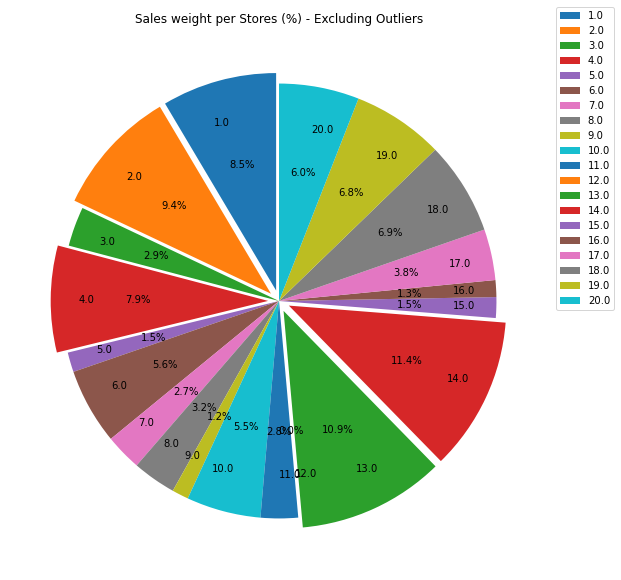

In [32]:
#Create a table where we store the Weekly_Sales amount & percentage per store

percentage_WS_wtore = pd.DataFrame(list_store)
percentage_WS_wtore = percentage_WS_wtore.rename(columns= {0:'Store'})

percentage_WS_wtore['Weekly_Sales_Total_clean'] = list_WS_all
percentage_WS_wtore['WS_Store_clean'] = list_WS_store
percentage_WS_wtore['WS_percentage_clean (%)'] = list_WS_percentage

percentage_WS_wtore = percentage_WS_wtore.sort_values(by=['Store'])
percentage_WS_wtore = percentage_WS_wtore.reset_index(drop=True)
display(percentage_WS_wtore)
print(' ')
print('--------------------------------------------------------------------------------------')
print(' ')
#Percentage of sales per store
WS_percentage_clean = percentage_WS_wtore.groupby(['Store'])['WS_percentage_clean (%)'].sum()

# Declaring indexes and values
WS_percentage_clean_values = WS_percentage_clean.values
WS_percentage_clean_index = WS_percentage_clean.index

#The pie chart provides the relative weight of each 'Store' in terme of weekly sales
plt.figure(figsize = (10, 10))
plt.pie(WS_percentage_clean, 
        autopct = '%1.1f%%',
        labels = WS_percentage_clean_index,
        labeldistance = 0.8,
        
        explode = (0.05,0.05,0.0,0.05,0.0,
                   0.0,0.0,0.0,0.0,0.0,
                   0.0,0.0,0.05,0.05,0.0,
                   0.0,0.0,0.0,0.0,0.0),
        
        startangle= 90
           )

plt.legend(WS_percentage_clean_index, bbox_to_anchor=(1.0, 1.05))
plt.title("Sales weight per Stores (%) - Excluding Outliers")
plt.show()


In [33]:
top5_store_clean = WS_percentage_clean.loc[1] + WS_percentage_clean.loc[2] + WS_percentage_clean.loc[4] + WS_percentage_clean.loc[13] + WS_percentage_clean.loc[14]
print('We see now that the Top 5 stores represente {}% of the whole sales.'.format(round(top5_store_clean,2)))
print('Meaning that 25% of the stores represente {}% of all sales, there is an even bigger concentration on some stores.'.format(round(top5_store_clean,2)))

We see now that the Top 5 stores represente 48.22% of the whole sales.
Meaning that 25% of the stores represente 48.22% of all sales, there is an even bigger concentration on some stores.


### 8. Columns creation

### a). CREATE CELSIUS COLUMNS

In [34]:
#Transform the temperature from fahrenheit to celsius
df_clean['Temperature_C'] = df_clean['Temperature'].apply(lambda x : ((1*x) - 32) * (5/9) )

### b). CREATE DATE TYPE COLUMNS

In [35]:
df_clean['date_time'] = df_clean['Date']

In [36]:
df_clean['day'] = pd.DatetimeIndex(df_clean['date_time']).day
df_clean['day'] = pd.to_numeric(df_clean['day'], downcast='integer')

In [37]:
#Creating a month column from column date_time
df_clean['month'] = pd.DatetimeIndex(df_clean['date_time']).month
df_clean['month'] = pd.to_numeric(df_clean['month'], downcast='integer')

#Encoding the months as categorial
df_clean['month'] = df_clean['month'].apply(lambda x : '1 - January' if x == 1
                                                    else '2 - February' if x == 2
                                                    else '3 - March' if x == 3
                                                    else '4 - April' if x == 4
                                                    else '5 - May' if x == 5
                                                    else '6 - June' if x == 6
                                                    else '7 - July' if x == 7
                                                    else '8 - August' if x == 8
                                                    else '9 - September' if x == 9
                                                    else 'a - October' if x == 10
                                                    else 'b - November' if x == 11
                                                    else 'c - December' if x == 12
                                                    else x)

In [38]:
#Creating a year column from column date_time
df_clean['year'] = pd.DatetimeIndex(df_clean['date_time']).year
df_clean['year'] = pd.to_numeric(df_clean['year'], downcast='integer')

#Encoding the year as categorial
df_clean['year'] = df_clean['year'].apply(lambda x : 'Y2010' if x == 2010
                                                else 'Y2011' if x == 2011
                                                else 'Y2012' if x == 2012
                                                else x)

In [39]:
#Creating a quarter column from column date_time
df_clean['quarter'] = pd.DatetimeIndex(df_clean['date_time']).quarter
df_clean['quarter'] = pd.to_numeric(df_clean['quarter'], downcast='integer')

#Encoding the year as categorial
df_clean['quarter'] = df_clean['quarter'].apply(lambda x : 'Q1' if x == 1
                                                        else 'Q2' if x == 2
                                                        else 'Q3' if x == 3
                                                        else 'Q4' if x == 4
                                                        else x)

In [40]:
#Creating a day_week column from column date_time
df_clean['day_week'] = pd.DatetimeIndex(df_clean['date_time']).dayofweek
df_clean['day_week'] = pd.to_numeric(df_clean['day_week'], downcast='integer')
df_clean['day_week']

#Encoding the year as categorial
df_clean['day_week'] = df_clean['day_week'].apply(lambda x : '1 - Monday' if x == 0
                                                        else '2 - Tuesday' if x == 1
                                                        else '3 - Wednesday' if x == 2
                                                        else '4 - Thursday' if x == 3
                                                        else '5 - Friday' if x == 4
                                                        else '6 - Saturday' if x == 5
                                                        else '7 - Sunday' if x == 6
                                                        else x)

In [41]:
#Restore the order by the index
df_clean = df_clean.sort_index()
df_clean.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Temperature_C,date_time,day,month,year,quarter,day_week
0,6.0,2011-02-18 00:00:00,1572117.54,no,59.61,3.045,214.777523,6.858,15.338889,2011-02-18 00:00:00,18,2 - February,Y2011,Q1,5 - Friday
1,13.0,2011-03-25 00:00:00,1807545.43,no,42.38,3.435,128.616064,7.470,5.766667,2011-03-25 00:00:00,25,3 - March,Y2011,Q1,5 - Friday
3,11.0,2011-04-05,1244390.03,no,84.57,2.735,214.556497,7.346,29.205556,2011-04-05,5,4 - April,Y2011,Q2,2 - Tuesday
4,6.0,2010-05-28 00:00:00,1644470.66,no,78.89,2.759,212.412888,7.092,26.050000,2010-05-28 00:00:00,28,5 - May,Y2010,Q2,5 - Friday
5,4.0,2010-05-28 00:00:00,1857533.70,no,75.19,2.756,126.160226,7.896,23.994444,2010-05-28 00:00:00,28,5 - May,Y2010,Q2,5 - Friday


In [42]:
print("Percentage of missing values: ")
print("---")
display(100*df_clean.isnull().sum()/df_clean.shape[0])

Percentage of missing values: 
---


Store            0.0
Date             0.0
Weekly_Sales     0.0
Holiday_Flag     0.0
Temperature      0.0
Fuel_Price       0.0
CPI              0.0
Unemployment     0.0
Temperature_C    0.0
date_time        0.0
day              0.0
month            0.0
year             0.0
quarter          0.0
day_week         0.0
dtype: float64


### **3. Data visualization**
---

### *Unemployment rate per Stores (incl. Outliers)*

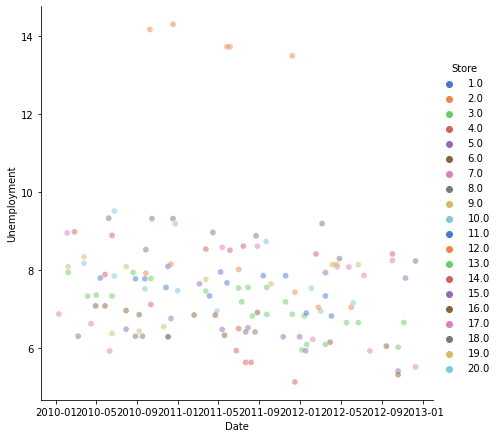

In [43]:

print('')
sns.relplot(x="Date", y="Unemployment", 
            hue="Store",
            sizes=(1000, 1000), 
            alpha=.5 , 
            palette='muted',
            height=6,
            #col='Holiday_Flag',
            data=df);

### *Unemployment rate per Stores (excl. Outliers)*

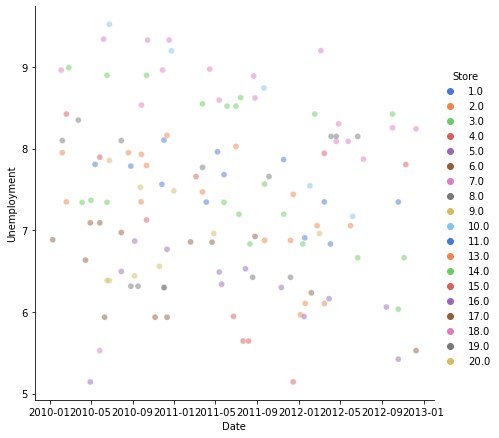

In [44]:

print('')
sns.relplot(x="Date", y="Unemployment", 
            hue="Store",
            sizes=(1000, 1000), 
            alpha=.5 , 
            palette="muted",
            height=6, 
            data=df_clean);

In [45]:
px.scatter(data_frame=df, x="Date", y="Weekly_Sales",color='Store',title='Weekly Sales per Date')

In [46]:
px.scatter(data_frame=df_clean, x="Temperature_C", y="Weekly_Sales",color='Store',title='Weekly Sales on temperature (Celsius)')

In [47]:
px.scatter(data_frame=df_clean, x="Fuel_Price", y="Weekly_Sales",color='Store',title='Weekly Sales on fuel price')

In [48]:
px.scatter(data_frame=df_clean, x="CPI", y="Weekly_Sales",color='Store',title='Weekly Sales on CPI')

In [49]:
px.scatter(data_frame=df, x="Unemployment", y="Weekly_Sales",color='Store',title='Weekly Sales on unemployment')

In [50]:
avg_sale_store = df.groupby('Store')['Weekly_Sales'].mean().reset_index()
px.bar(avg_sale_store, x = 'Store', y = 'Weekly_Sales',title="Average weekly sales per Store (initial dataset)", color='Store')

In [51]:
avg_sale_store2 = df_clean.groupby('Store')['Weekly_Sales'].mean().reset_index()
px.bar(avg_sale_store2, x = 'Store', y = 'Weekly_Sales',title="Average weekly sales per Store (cleaned dataset)", color='Store')

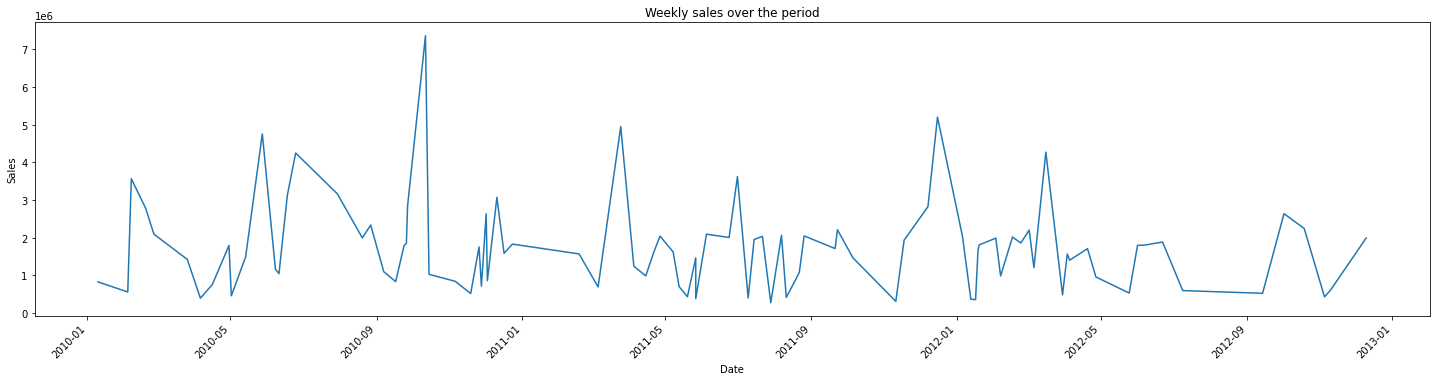

In [52]:
amount_sale_date = df_clean.groupby('Date')['Weekly_Sales'].sum().reset_index()
avg_sale_CPI = df_clean.groupby('Date')['Temperature'].mean().reset_index()

# plot
plt.figure(figsize=(25,6))
plt.plot(amount_sale_date['Date'],amount_sale_date['Weekly_Sales'])
#plt.plot(avg_sale_CPI['Date'],avg_sale_CPI['Temperature'], secondary_y = True)
plt.xlabel("Date")
plt.ylabel("Sales")
# beautify the x-labels
plt.gcf().autofmt_xdate()
plt.title('Weekly sales over the period')
plt.xticks(rotation=45)
plt.show()



### **4. Preprocessing & Machine Learning**
---

## A) CORRELATION MATRIX

In [53]:
#Delete column date as it has been spread in years, months, weeks etc
#Delete date and date_time column in order to avoid colinearity
df_clean = df_clean.drop(columns=['Date','date_time','Temperature','day'],axis=1)

,Weekly_Sales,Fuel_Price,CPI,Unemployment,Temperature_C
Weekly_Sales,1.000000,0.021704,-0.310638,0.228782,-0.129325
Fuel_Price,0.021704,1.000000,-0.161764,-0.007314,-0.069351
CPI,-0.310638,-0.161764,1.000000,-0.210853,0.185865
Unemployment,0.228782,-0.007314,-0.210853,1.000000,-0.252399
Temperature_C,-0.129325,-0.069351,0.185865,-0.252399,1.000000


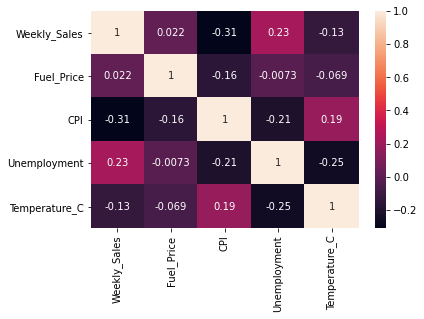

 *The heatmap does not show any correlation between the numerical variables


In [54]:
# Correlation matrix
corr_matrix = df_clean.drop(columns=['Store'],axis=1) #We remove the column 'Store' because it's a categorial feature
corr_matrix = corr_matrix.corr()
display(corr_matrix)

#Corr_matrix heatmap
sns.heatmap(corr_matrix, annot=True)
plt.show()
print(' *The heatmap does not show any correlation between the numerical variables')

In [55]:
df_clean.shape

(131, 11)

## B) MODEL PREPROCESSING

### 1. Split train / test set

In [56]:
# Separate target variable Y from features X
target_name = 'Weekly_Sales'

print("Separating labels from features...")
Y = df_clean.loc[:,target_name]
X = df_clean.loc[:,[c for c in df_clean.columns if c!=target_name]] # Keeping all columns
print("...Done.")
display(Y.head())
print()
display(X.head())
print()

Separating labels from features...
...Done.


0    1572117.54
1    1807545.43
3    1244390.03
4    1644470.66
5    1857533.70
Name: Weekly_Sales, dtype: float64

,Store,Holiday_Flag,Fuel_Price,CPI,Unemployment,Temperature_C,month,year,quarter,day_week
0,6.0,no,3.045,214.777523,6.858,15.338889,2 - February,Y2011,Q1,5 - Friday
1,13.0,no,3.435,128.616064,7.470,5.766667,3 - March,Y2011,Q1,5 - Friday
3,11.0,no,2.735,214.556497,7.346,29.205556,4 - April,Y2011,Q2,2 - Tuesday
4,6.0,no,2.759,212.412888,7.092,26.050000,5 - May,Y2010,Q2,5 - Friday
5,4.0,no,2.756,126.160226,7.896,23.994444,5 - May,Y2010,Q2,5 - Friday


In [57]:
print("Dividing into train and test sets...")
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0#, stratify=Y
                                                   )
print("...Done.")
print()

Dividing into train and test sets...
...Done.



<span style="color:black">**Note** : No need to implement a SimpleImputer nor OneHotEncoder in the pipeline for numeric nor categorial columns as we already have treated the missing values into our EDA analysis !</span>

In [58]:
print(X_train.loc[0:5,:]) # see where the numeric columns are in X_train

# Create pipeline for numeric features
numeric_features = [2, 3, 4, 5] # Positions of numeric columns in X_train/X_test
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')), # if still missing values we will replace by the average of the column
    ('scaler', StandardScaler())
    ])

Empty DataFrame
Columns: [Store, Holiday_Flag, Fuel_Price, CPI, Unemployment, Temperature_C, month, year, quarter, day_week]
Index: []


In [59]:
# Create pipeline for categorical features
categorical_features = [0, 1, 6, 7, 8, 9] # Positions of categorical columns in X_train/X_test
categorical_transformer = Pipeline(
    steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')), # if still missing values we will replace by most frequent value
    ('encoder', OneHotEncoder(drop='first')) # first column will be dropped to avoid creating correlations between features
    ])

In [60]:
# Use 'ColumnTranformer' to make a preprocessor object that describes all the treatments to be done
preprocessor = ColumnTransformer(
                transformers=[
                    ('num', numeric_transformer, numeric_features),
                        ('cat', categorical_transformer, categorical_features)
                            ])

# Preprocessings on train set
print("Performing preprocessings on train set...")
X_train = preprocessor.fit_transform(X_train)
print('...Done.')
print()

# Preprocessings on test set
print("Performing preprocessings on test set...")
X_test = preprocessor.transform(X_test) # Don't fit again !!
print('...Done.')
print()

Performing preprocessings on train set...
...Done.

Performing preprocessings on test set...
...Done.



### 2. Model training & predictions

### a). Training model

In [61]:
# Train model
regressor = LinearRegression()

print("Training model...")
regressor.fit(X_train, Y_train) # Training is always done on train set !!
print("...Done.")

Training model...
...Done.


### b). Predictions

In [62]:
# Predictions on traing set
print("Predictions on training set...")
Y_train_pred = regressor.predict(X_train)
print("...Done.")
print(Y_train_pred[0:5])
print()

Predictions on training set...
...Done.
[2149847.11228802 1621577.22568669 1224777.68907464 1324403.67916389
  321823.95155291]



In [63]:
# Predictions on test set
print("Predictions on test set...")
Y_test_pred = regressor.predict(X_test)
print("...Done.")
print(Y_test_pred[0:5])
print()

Predictions on test set...
...Done.
[339660.50674538 382042.80457807 999872.43564359 787799.82026671
 388619.45451862]



### c). Performances evaluation

In [64]:
# Print R^2 scores
print('R2 score on training set : %.3f' % r2_score(Y_train, Y_train_pred,multioutput='variance_weighted'))
print('R2 score on test set : %.3f' % r2_score(Y_test, Y_test_pred,multioutput='variance_weighted'))


R2 score on training set : 0.971
R2 score on test set : 0.944


In [65]:
# The mean squared error on train
print("Mean squared error on train: %.2f" % np.mean((regressor.predict(X_train) - Y_train) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score on train: %.4f' % regressor.score(X_train, Y_train))

Mean squared error on train: 12477260353.47
Variance score on train: 0.9714


In [66]:
# The mean squared error on test
print("Mean squared error on test: %.2f" % np.mean((regressor.predict(X_test) - Y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score on test: %.4f' % regressor.score(X_test, Y_test))

Mean squared error on test: 21271559035.41
Variance score on test: 0.9440



### **5. Model assessment & Regularization**
---

## A) Assess feature impact (relative weight)

In [67]:
categorial_features = list(preprocessor.transformers_[1][1]['encoder'].get_feature_names())
numerical_features = ['Fuel_Price','CPI','Unemployment','Temperature_C']
X_features = categorial_features + numerical_features

In [68]:
X_features_clean = ['Store_2','Store_3','Store_4','Store_5','Store_6','Store_7','Store_8','Store_9','Store_10','Store_11','Store_13','Store_14','Store_15','Store_16','Store_17','Store_18','Store_19','Store_20',
                     'holiday_yes',
                     '2 - February','3 - March','4 - April','5 - May','6 - June','7 - July','8 - August','9 - September','a - October','b - November','c - December',
                     'Y2011','Y2012',
                     'Q2','Q3', 'Q4',
                     '2 - Tuesday','3 - Wednesday','4 - Thursday','5 - Friday','6 - Saturday','7 - Sunday',
                     'Fuel_Price',
                     'CPI',
                     'Unemployment',
                     'Temperature_C']

In [69]:
labels_coefs = pd.DataFrame(X_features_clean)

coefs = pd.DataFrame(data = regressor.coef_.transpose(), columns=["Coefficients"])

coef_matrice = pd.concat([labels_coefs,coefs], axis=1)

coef_matrice = coef_matrice.rename(columns={0:'Labels'})
coef_matrice['Coefficients'] = coef_matrice['Coefficients']/100000

coef_matrice

,Labels,Coefficients
0,Store_2,-0.140679
1,Store_3,-0.202388
2,Store_4,-0.688657
3,Store_5,-0.082938
4,Store_6,3.495720
5,Store_7,-12.205606
6,Store_8,4.091635
7,Store_9,-13.592933
8,Store_10,-0.270130
9,Store_11,-9.409630


In [70]:
#Transforming Scipy Sparse Matrix to Numpy array for X_train and X_test
X_train = X_train.toarray()
X_test = X_test.toarray()

In [71]:
import statsmodels.api as st

X_train = st.add_constant(X_train)
X_test = st.add_constant(X_test)
ols = st.OLS(Y_train, X_train)
ols_fit = ols.fit()
ols_fit.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Weekly_Sales   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     49.25
Date:                Mon, 27 Sep 2021   Prob (F-statistic):           3.01e-34
Time:                        23:34:24   Log-Likelihood:                -1356.4
No. Observations:                 104   AIC:                             2799.
Df Residuals:                      61   BIC:                             2913.
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.537e+06   1.88e+05      8.191      0.000    1.16e+06    1.91e+06
x1         -1.407e+04   3.54e+04     -0.397      0.692   -8.48e+04    5.67e+04
x2         -2.024e+04   1.23e+05     -0.164      0.870   -2.67e+05    2.26e+05
x3         -6.887e+04   3.13e+04     -2.198      0.032   -1.32e+05   -6213.986
x4         -8293.8394   2.75e+04     -0.301      0.764   -6.33e+04    4.67e+04
x5          3.496e+05   1.01e+05      3.475      0.001    1.48e+05    5.51e+05
x6         -1.221e+06   9.04e+04    -13.502      0.000    -1.4e+06   -1.04e+06
x7          4.092e+05   2.95e+05      1.388      0.170    -1.8e+05    9.99e+05
x8         -1.359e+06   9.86e+04    -13.780      0.000   -1.56e+06   -1.16e+06
x9         -2.701e+04   9.59e+04     -0.282      0.779   -2.19e+05    1.65e+05
x10         -9.41e+05    1.2e+05     -7.854      0.000   -1.18e+06   -7.01e+05
x11        -8.726e+05   1.16e+05     -7.521      0.000    -1.1e+06   -6.41e+05
x12        -1.248e+06   1.28e+05     -9.743      0.000    -1.5e+06   -9.92e+05
x13         2.428e+05   2.95e+05      0.823      0.414   -3.47e+05    8.32e+05
x14         3.954e+04   1.35e+05      0.293      0.771   -2.31e+05     3.1e+05
x15         3.215e+05   2.86e+05      1.125      0.265    -2.5e+05    8.93e+05
x16         5.002e+05    1.5e+05      3.345      0.001    2.01e+05    7.99e+05
x17        -9.251e+05   2.74e+05     -3.378      0.001   -1.47e+06   -3.77e+05
x18        -1.136e+06   1.39e+05     -8.199      0.000   -1.41e+06   -8.59e+05
x19        -8.547e+05   2.94e+05     -2.904      0.005   -1.44e+06   -2.66e+05
x20        -3.968e+05   2.68e+05     -1.482      0.144   -9.32e+05    1.39e+05
x21        -1.791e+05   2.66e+05     -0.673      0.504   -7.12e+05    3.53e+05
x22         3.031e+05   1.08e+05      2.795      0.007    8.62e+04     5.2e+05
x23         -4.25e+04   7.92e+04     -0.537      0.594   -2.01e+05    1.16e+05
x24         5.639e+04      1e+05      0.562      0.576   -1.44e+05    2.57e+05
x25         1.174e+04   1.02e+05      0.116      0.908   -1.92e+05    2.15e+05
x26        -6.559e+04   6.09e+04     -1.077      0.286   -1.87e+05    5.62e+04
x27          -3.3e+04   5.34e+04     -0.618      0.539    -1.4e+05    7.38e+04
x28         7.964e+04   5.22e+04      1.527      0.132   -2.46e+04    1.84e+05
x29        -8812.9364   5.38e+04     -0.164      0.870   -1.16e+05    9.87e+04
x30         4749.3643   6.07e+04      0.078      0.938   -1.17e+05    1.26e+05
x31        -8889.0729   6.98e+04     -0.127      0.899   -1.48e+05    1.31e+05
x32        -1.998e+04   6.06e+04     -0.330      0.743   -1.41e+05    1.01e+05
x33         3039.2322   6.23e+04      0.049      0.961   -1.22e+05    1.28e+05
x34         1.041e+05   5.22e+04      1.995      0.051    -262.908    2.08e+05
x35         -2.54e+04   7.32e+04     -0.347      0.730   -1.72e+05    1.21e+05
x3

## B) REGULARIZATION

### 1. Regularization LASSO

In [72]:
lin = LinearRegression()
lasso1 = Lasso(alpha = 1)
lasso001 = Lasso(alpha = 0.01)
lasso00001 = Lasso(alpha = 0.0001)

In [73]:
lin.fit(X_train, Y_train)
lasso1.fit(X_train, Y_train)
lasso001.fit(X_train, Y_train)
lasso00001.fit(X_train, Y_train)

/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 161059676049.38684, tolerance: 4530012946.550416

/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 171974501865.12207, tolerance: 4530012946.550416

/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 644571481110.4778, tolerance: 4530012946.550416



Lasso(alpha=0.0001)

In [74]:
baseline_pred = [Y_test.values.mean()]*len(Y_test)
print("Test scores \n")
print("Score Baseline : {} \nScore Lin : {} \nScore Lasso1 : {} \nScore Lasso001 : {} \nScore Lasso00001 : {}".format(r2_score(Y_test, baseline_pred),
lin.score(X_test, Y_test),
lasso1.score(X_test, Y_test),
lasso001.score(X_test, Y_test),
lasso00001.score(X_test,Y_test)))

Test scores 

Score Baseline : 0.0 
Score Lin : 0.9440105571120025 
Score Lasso1 : 0.9440250501069535 
Score Lasso001 : 0.944010561040684 
Score Lasso00001 : 0.9440104157044747


In [75]:
print("Train MSE \n")

print("MSE Baseline : {} \nMSE Lin : {} \nMSE Lasso1 : {} \nMSE Lasso001 : {} \nMSE Lasso00001 : {}".format(mean_squared_error(Y_test, baseline_pred),
mean_squared_error(Y_train,lin.predict(X_train)),
mean_squared_error(Y_train,lasso1.predict(X_train)),
mean_squared_error(Y_train,lasso001.predict(X_train)),
mean_squared_error(Y_train,lasso00001.predict(X_train))))

Train MSE 

MSE Baseline : 379920890049.3889 
MSE Lin : 12477260353.466923 
MSE Lasso1 : 12477264278.66735 
MSE Lasso001 : 12477260353.822346 
MSE Lasso00001 : 12477260353.615408


In [76]:
print("Test MSE \n")

print("MSE Baseline : {} \nMSE Lin : {} \nMSE Lasso1 : {} \nMSE Lasso001 : {} \nMSE Lasso00001 : {}".format(mean_squared_error(Y_test, baseline_pred),
mean_squared_error(Y_test,lin.predict(X_test)),
mean_squared_error(Y_test,lasso1.predict(X_test)),
mean_squared_error(Y_test,lasso001.predict(X_test)),
mean_squared_error(Y_test,lasso00001.predict(X_test))))


Test MSE 

MSE Baseline : 379920890049.3889 
MSE Lin : 21271558975.37741 
MSE Lasso1 : 21266052783.83618 
MSE Lasso001 : 21271557482.789257 
MSE Lasso00001 : 21271612699.051247


In [77]:
print("Linear Regression \n Proportion of coefficients equal to zero")
print(np.sum(lin.coef_==0)/len(lin.coef_))
print("\n Distribution of coefficients \n")
px.histogram(lin.coef_)

Linear Regression 
 Proportion of coefficients equal to zero
0.0

 Distribution of coefficients 



### 2. GridSearchCV (LASSO)

In [78]:
params = {'alpha' : [10**(-a) for a in range(5)]}
lasso = Lasso()
grid = GridSearchCV(lasso,param_grid=params, cv = 3, verbose=1)

grid.fit(X_train,Y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 196166247387.5195, tolerance: 3054609141.5538435

/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 49085759099.065186, tolerance: 2877585168.342598

/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 72406516967.64435, tolerance: 3031738977.7370577

/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning:

Objective did not converge. You might want to incre

Fitting 3 folds for each of 5 candidates, totalling 15 fits


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 264217677685.73343, tolerance: 2877585168.342598

/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 73005409828.9065, tolerance: 3031738977.7370577

/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 202497814954.15585, tolerance: 3054609141.5538435

/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 298722061119.6253, tolerance: 28775851

GridSearchCV(cv=3, estimator=Lasso(),
             param_grid={'alpha': [1, 0.1, 0.01, 0.001, 0.0001]}, verbose=1)

In [79]:
grid.best_params_

{'alpha': 1}

In [80]:
print('The best parameter alpha is {}.'.format(grid.best_params_['alpha']))

The best parameter alpha is 1.


In [81]:
print("BEST ESTIMATOR \n")
print("train $R^2$ \n")
best_model = grid.best_estimator_
print(best_model.score(X_train, Y_train))
print("\n")
print("test $R^2$ \n")
print(best_model.score(X_test, Y_test))
print("\n \n")
print("train MSE \n")
print(mean_squared_error(Y_train,best_model.predict(X_train)))
print("\n")
print("test MSE \n")
print(mean_squared_error(Y_test,best_model.predict(X_test)))


BEST ESTIMATOR 

train $R^2$ 

0.9713547069226469


test $R^2$ 

0.9440250501069535

 

train MSE 

12477264278.66735


test MSE 

21266052783.83618


### 3. Regularization RIDGE

In [82]:
linear_regressor = LinearRegression()
ridge_regressor_small_alpha = Ridge(alpha = 10)
ridge_regressor_large_alpha = Ridge(alpha = 10000)

In [83]:
linear_regressor.fit(X_train, Y_train)
ridge_regressor_small_alpha.fit(X_train, Y_train)
ridge_regressor_large_alpha.fit(X_train, Y_train)

Ridge(alpha=10000)

In [84]:
print("Score on training: ")
print("Linear Regression score : {}".format(linear_regressor.score(X_train, Y_train)))
print("Ridge with small Alpha score : {}".format(ridge_regressor_small_alpha.score(X_train, Y_train)))
print("Ridge with large Alpha score : {}".format(ridge_regressor_large_alpha.score(X_train,Y_train)))

Score on training: 
Linear Regression score : 0.9713547159341188
Ridge with small Alpha score : 0.630533659953078
Ridge with large Alpha score : 0.004181086083465013


In [85]:
print("Score on test: ")
print("Linear Regression score: {}".format(linear_regressor.score(X_test, Y_test)))
print("Ridge with small Alpha score: {}".format(ridge_regressor_small_alpha.score(X_test, Y_test)))
print("Ridge with large Alpha score: {}".format(ridge_regressor_large_alpha.score(X_test,Y_test)))

Score on test: 
Linear Regression score: 0.9440105571120025
Ridge with small Alpha score: 0.5212352798650437
Ridge with large Alpha score: -0.0780022430721139


### 4. GridSearchCV (RIDGE)

In [86]:
params = {'alpha': np.arange(0,10000,100,)} # determine the range of parameters to try
ridge = Ridge() # create an instance of the model

grid = GridSearchCV(ridge, params, cv = 10, verbose = 1)
grid_fit = grid.fit(X_train, Y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    4.5s finished


In [87]:
print("Optimal value for alpha : ", grid_fit.best_params_)

Optimal value for alpha :  {'alpha': 100}


In [88]:
print('Test score for the best model : ', grid_fit.best_estimator_.score(X_test,Y_test))

Test score for the best model :  0.1476753551162161


In [89]:
scores = cross_val_score(grid_fit.best_estimator_, X_train, Y_train, cv = 10)

print('The cross-validated R2-score is : ', scores.mean())
print('The standard deviation is : ', scores.std())

The cross-validated R2-score is :  -0.030243329054812938
The standard deviation is :  0.35102095807190276



### **5. Conclusion**
---

This models developped are quite good to predict the weekly sales. Even when we apply regularization technics to fight overfitting.